#Tópicos
* Variáveis
* Tipos de dados
* Estrutura de dados
* Estrutura de condição
* Estrutura de repetição
* Funções
* Bibliotecas
* Bibliotecas externas
* Pandas
* SQL Alchemy
* Data viz
* Instalação do DBT

# Variáveis

In [ ]:
inteiro = 10
inteiro

10

# Tipos de dados

In [ ]:
inteiro = 10
flutuante = 20.5
texto = 'texto' #, "texto", '''texto''', """texto"""
booleano = True
type(inteiro), type(flutuante), type(texto), type(booleano)

(int, float, str, bool)

#Estruturas de dados

In [ ]:
tuplas = (1,2,3,4,5)
tuplas

(1, 2, 3, 4, 5)

In [ ]:
listas = [1,2,3,4,5]
listas

[1, 2, 3, 4, 5]

In [ ]:
idade = 18
dicionarios = {'nome': "joão", 'idade': idade}
dicionarios

{'nome': 'joão', 'idade': 18}

In [ ]:
dicionarios['nome']

'joão'

In [ ]:
dicionarios['idade']

18

#Estrutura condicional

In [ ]:
if idade <= 0:
  print('Idade inválida!') # teste de dados
elif idade < 18:
  print('Menor idade')
else: # idade >= 18
  print('Maior de idade')

Maior de idade


#Estrutura de repetição

In [ ]:
for idade in range(0,10):
  print(idade, sep=',', end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [ ]:
def avalia_idade(idade=0):
  if idade <= 0:
    return 'Idade inválida!' # teste de dados
  elif idade < 18:
    return 'Menor idade'
  else: # idade >= 18
    return 'Maior de idade'

In [ ]:
resultado = avalia_idade()
resultado

'Idade inválida!'

In [ ]:
for idade in range(0,50,10):
  print(idade, avalia_idade(idade))

0 Idade inválida!
10 Menor idade
20 Maior de idade
30 Maior de idade
40 Maior de idade


In [ ]:
from biblioteca.funcoes import avalia_idade_biblioteca
avalia_idade_biblioteca

<function biblioteca.funcoes.avalia_idade_biblioteca(idade=0)>

In [ ]:
avalia_idade

<function __main__.avalia_idade(idade=0)>

In [ ]:
for idade in range(0,50,10):
  print(idade, avalia_idade_biblioteca(idade))

0 Idade inválida!
10 Menor idade
20 Maior de idade
30 Maior de idade
40 Maior de idade


In [ ]:
dados = {
    'idade': (0, 10, 20 ,30 , 40),
    'avaliacao': ('Idade inválida!', 'Menor idade', 'Maior de idade', 'Maior de idade', 'Maior de idade'),
}
dados

{'idade': (0, 10, 20, 30, 40),
 'avaliacao': ('Idade inválida!',
  'Menor idade',
  'Maior de idade',
  'Maior de idade',
  'Maior de idade')}

In [ ]:
!pip install pandas

In [ ]:
from pandas import DataFrame
df = DataFrame(dados)
df

,idade,avaliacao
0,0,Idade inválida!
1,10,Menor idade
2,20,Maior de idade
3,30,Maior de idade
4,40,Maior de idade


In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///banco_dados.sqlite

In [ ]:
%sql select * from idades

 * sqlite:///banco_dados.sqlite
Done.


index,idade,avaliacao
0,0,Idade inválida!
1,10,Menor idade
2,20,Maior de idade
3,30,Maior de idade
4,40,Maior de idade


In [ ]:
from sqlite3 import connect
conexao = connect('///content/banco_dados.sqlite')

In [ ]:
df.to_sql('idades', conexao, if_exists='replace')

5

In [ ]:
%%sql
select
  avaliacao,
  count(*) qtd
from idades
group by 1
order by 2;

 * sqlite:///banco_dados.sqlite
Done.


avaliacao,qtd
Idade inválida!,1
Menor idade,1
Maior de idade,3


In [ ]:
query = '''
select
  avaliacao,
  count(*) qtd
from idades
group by 1
order by 2 desc;
'''

In [ ]:
import pandas as pd
df2 = pd.read_sql_query(query, conexao, index_col='avaliacao')
df2

,qtd
avaliacao,
Maior de idade,3
Menor idade,1
Idade inválida!,1


<Axes: ylabel='qtd'>

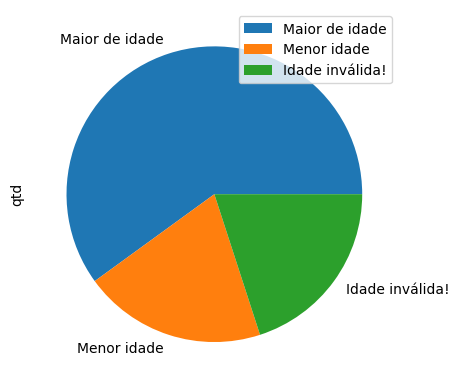

In [ ]:
df2.plot(kind='pie', y='qtd')

In [ ]:
!pip install dbt-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 991.0/991.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━